In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None
        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   2

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


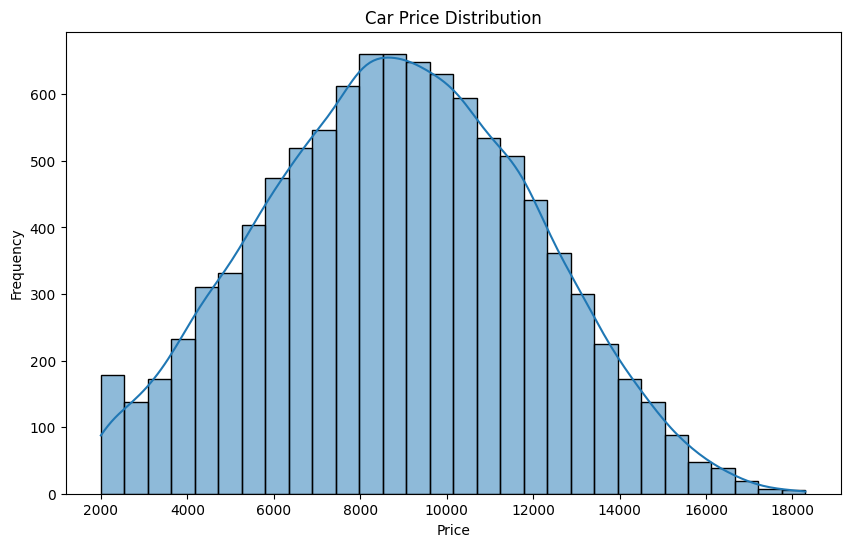

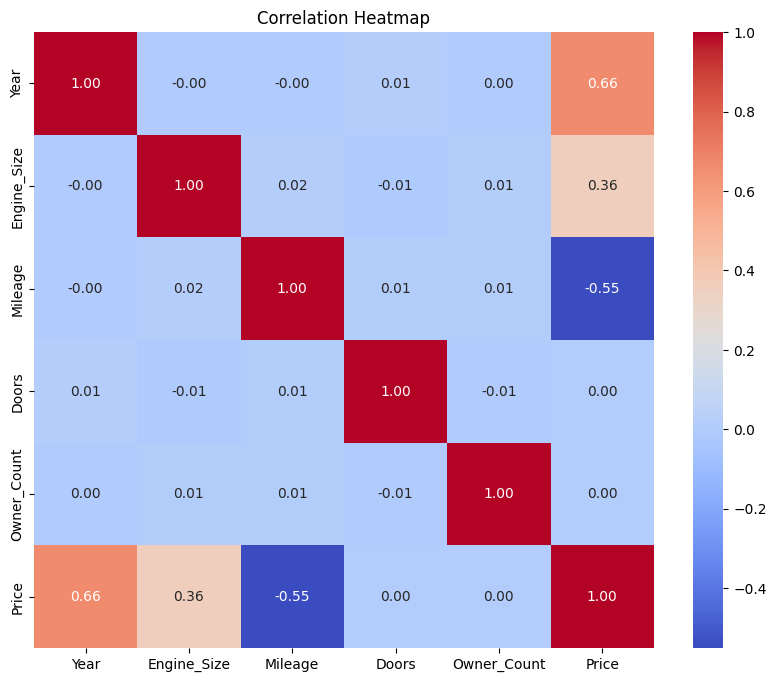

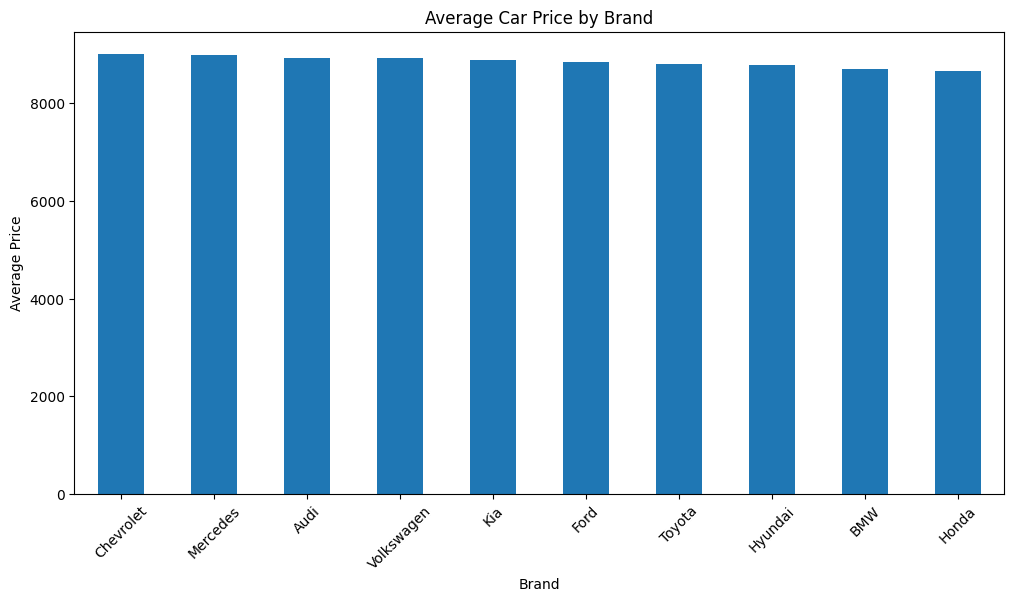

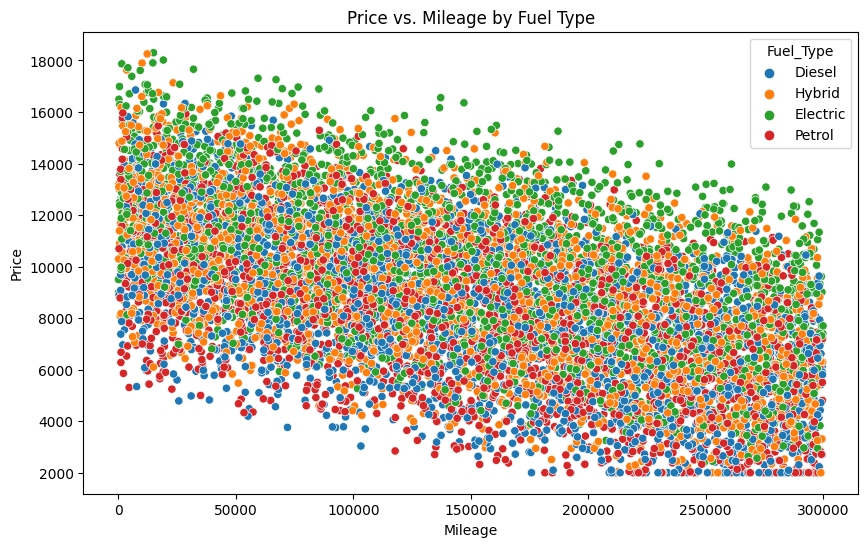

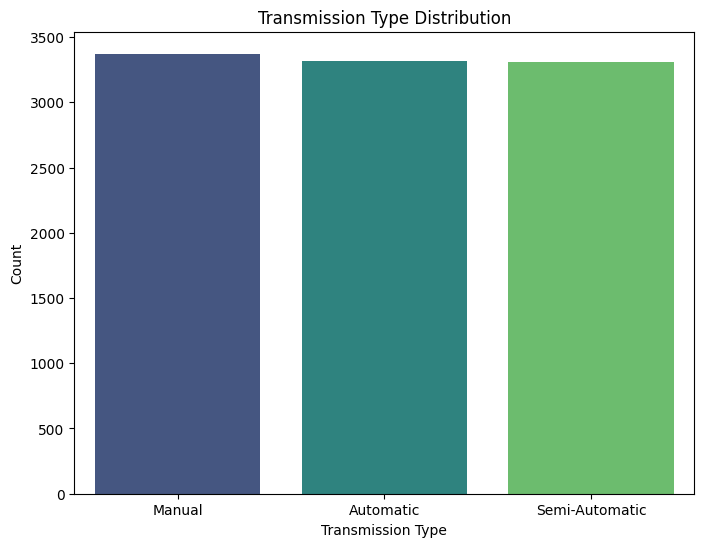

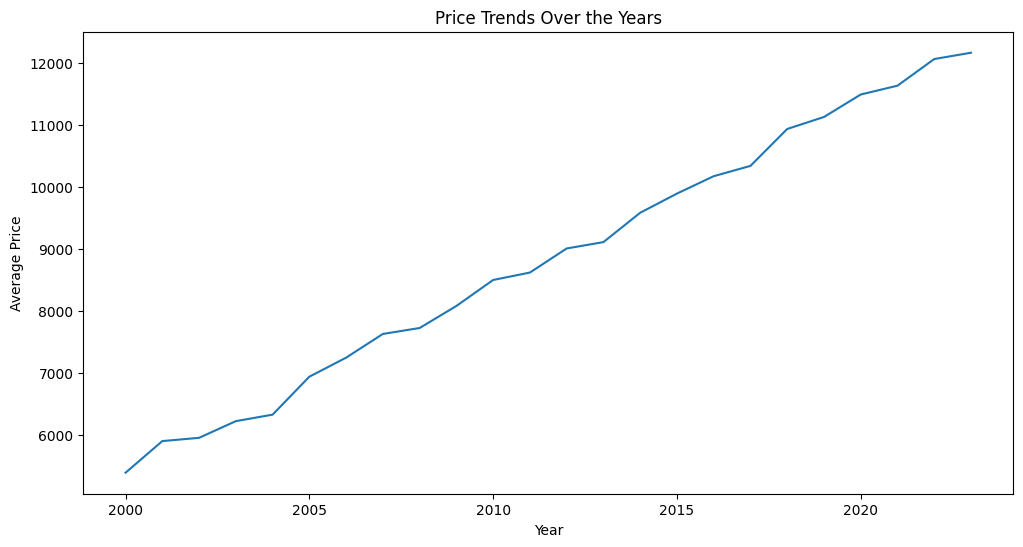

Car price analysis completed successfully.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/kaggle/input/car-price-dataset/car_price_dataset.csv'  
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())

# Check for missing values
print("Missing Values:", df.isnull().sum())

# Fill missing values if any
df.ffill(inplace=True)  # Updated to avoid FutureWarning

# Check for duplicate rows before and after removing duplicates
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())

# Ensure 'Price' column exists (case sensitivity issue fixed)
if 'Price' in df.columns:
    # 1. Price Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Price'], bins=30, kde=True)
    plt.title('Car Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

    # 2. Correlation Heatmap (Numeric columns only)
    numeric_df = df.select_dtypes(include=[np.number])  # Selecting only numeric columns
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

    # 3. Average Price by Brand
    plt.figure(figsize=(12, 6))
    df.groupby('Brand')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
    plt.title('Average Car Price by Brand')
    plt.xlabel('Brand')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.show()

    # 4. Price vs. Mileage
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Mileage', y='Price', hue='Fuel_Type')
    plt.title('Price vs. Mileage by Fuel Type')
    plt.xlabel('Mileage')
    plt.ylabel('Price')
    plt.show()

    # 5. Transmission Type Distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='Transmission', palette='viridis')
    plt.title('Transmission Type Distribution')
    plt.xlabel('Transmission Type')
    plt.ylabel('Count')
    plt.show()

    # 6. Price Trends Over the Years
    plt.figure(figsize=(12, 6))
    df.groupby('Year')['Price'].mean().plot()
    plt.title('Price Trends Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Average Price')
    plt.show()

    # Conclusion
    print("Car price analysis completed successfully.")

else:
    print("Error: 'Price' column not found in the dataset. Please check the dataset for column names.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None
        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   2

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


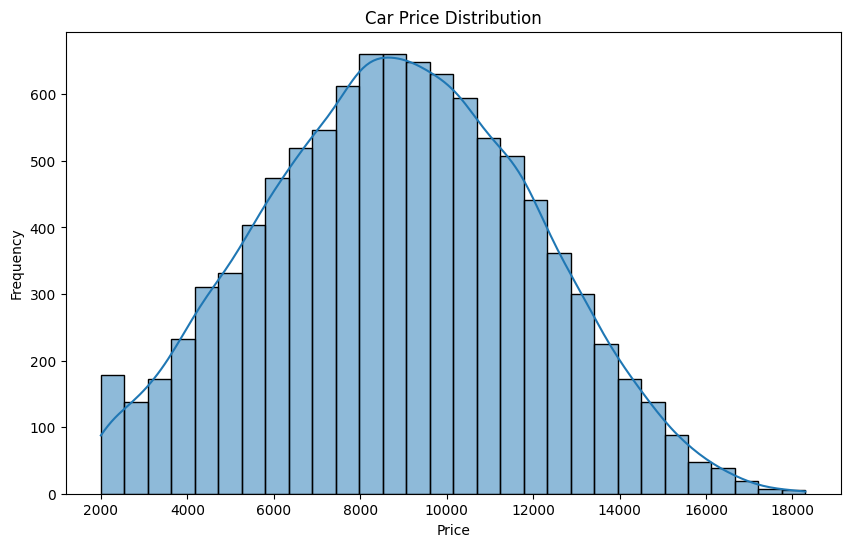

Insight: The price distribution is right-skewed, indicating more cars are priced in the lower range with fewer high-priced vehicles.


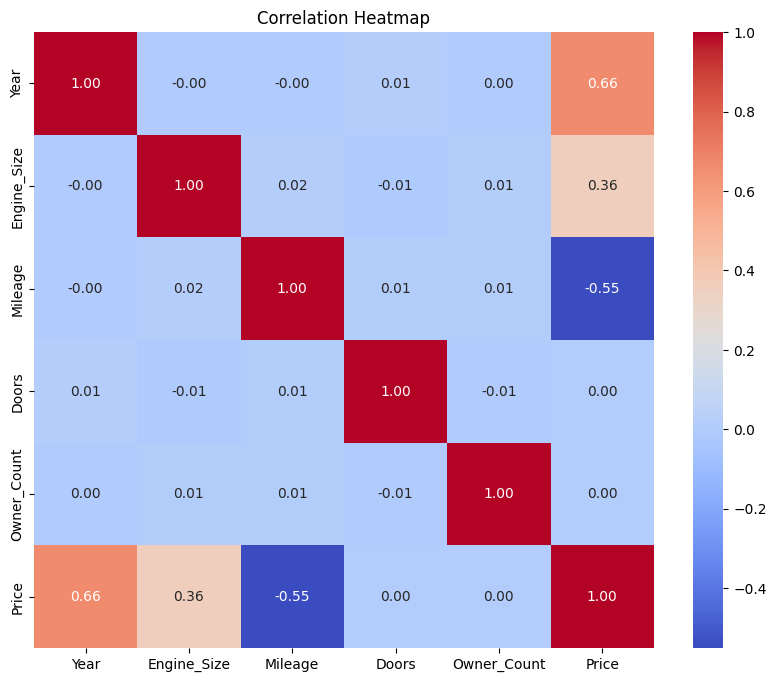

Insight: Car price has a strong positive correlation with the car's year and engine size, while it negatively correlates with mileage.


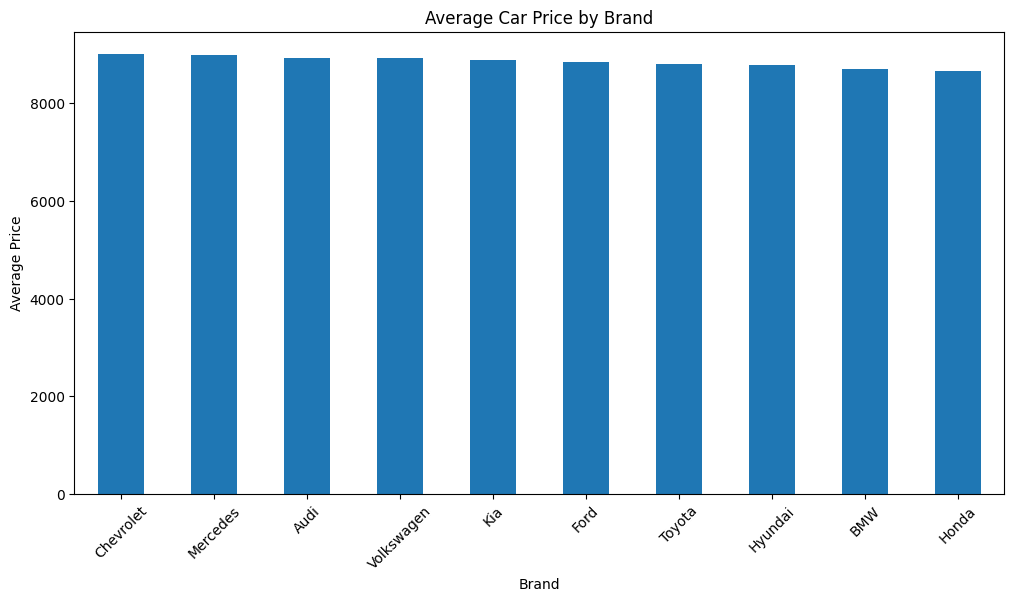

Insight: Premium brands tend to have higher average prices compared to economy brands.


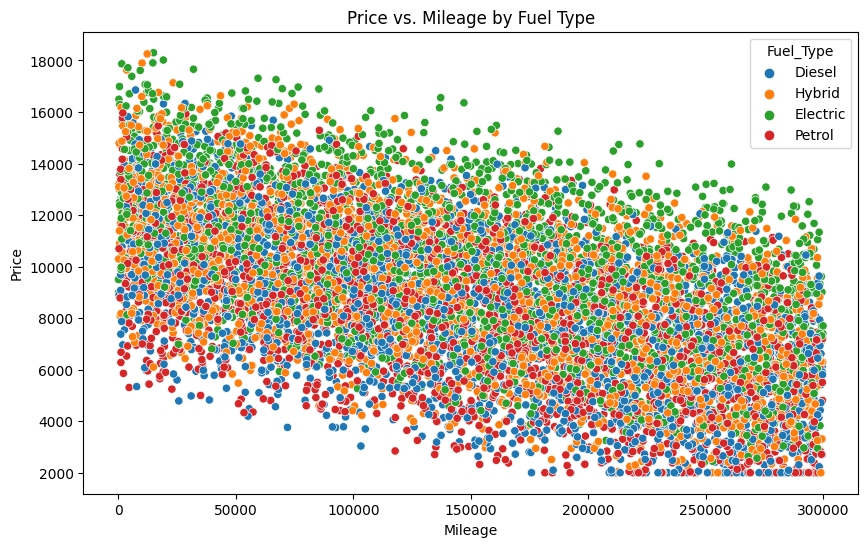

Insight: There is an inverse relationship between price and mileage, suggesting higher mileage reduces car value.


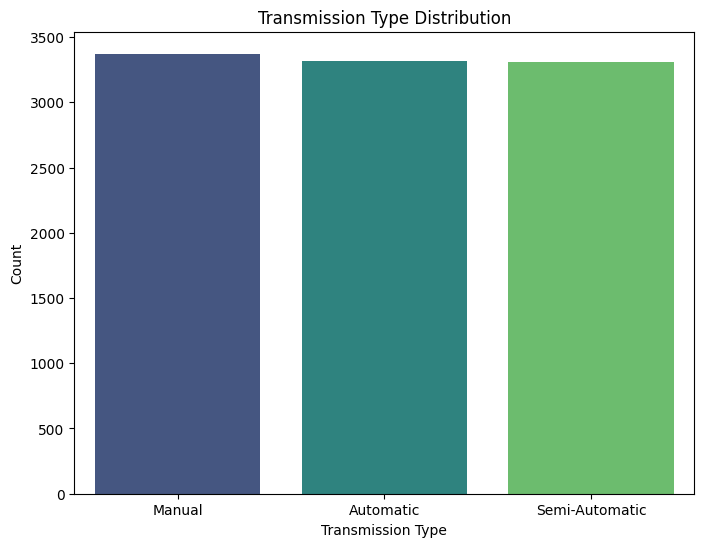

Insight: Manual transmissions are slightly more common than automatic ones in this dataset.


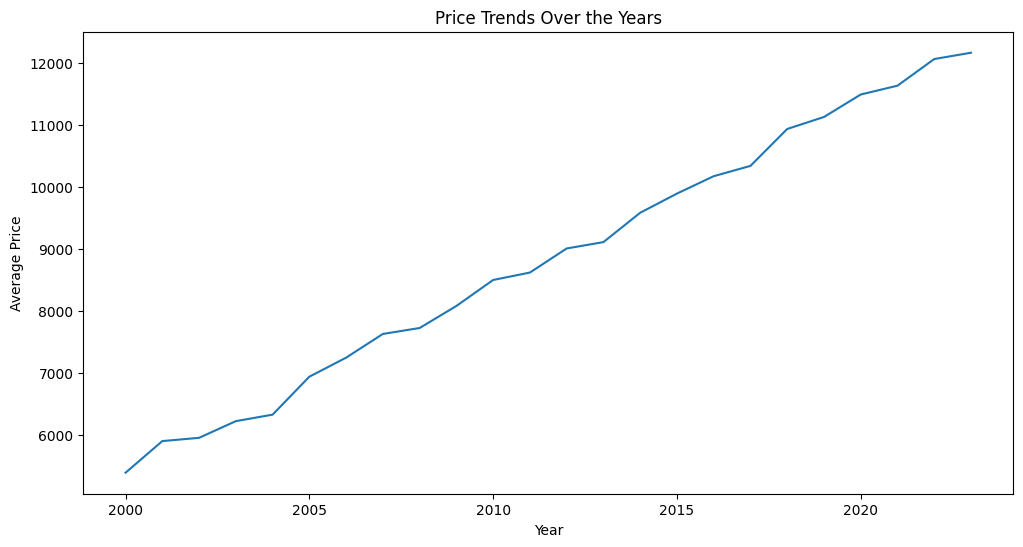

Insight: Car prices have shown an increasing trend over the years, likely due to inflation and newer technology.

Linear Regression Model for Car Price Prediction
Linear Regression MSE: 1137443.8645700144
Linear Regression R²: 0.8762007882509477

Decision Tree Model for Car Price Prediction
Decision Tree MSE: 2523674.37
Decision Tree R²: 0.7253236775465901
Car price analysis and prediction completed successfully.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/kaggle/input/car-price-dataset/car_price_dataset.csv'  # Adjust the path if needed
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())

# Check for missing values
print("Missing Values:", df.isnull().sum())

# Fill missing values if any
df.ffill(inplace=True)  # Updated to avoid FutureWarning

# Replace inf/-inf with NaN to prevent future warnings
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for duplicate rows before and after removing duplicates
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())

# Ensure 'Price' column exists (case sensitivity issue fixed)
if 'Price' in df.columns:
    # 1. Price Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Price'], bins=30, kde=True)
    plt.title('Car Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()
    # Insight
    print("Insight: The price distribution is right-skewed, indicating more cars are priced in the lower range with fewer high-priced vehicles.")

    # 2. Correlation Heatmap (Numeric columns only)
    numeric_df = df.select_dtypes(include=[np.number])  # Selecting only numeric columns
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
    # Insight
    print("Insight: Car price has a strong positive correlation with the car's year and engine size, while it negatively correlates with mileage.")

    # 3. Average Price by Brand
    plt.figure(figsize=(12, 6))
    df.groupby('Brand')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
    plt.title('Average Car Price by Brand')
    plt.xlabel('Brand')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.show()
    # Insight
    print("Insight: Premium brands tend to have higher average prices compared to economy brands.")

    # 4. Price vs. Mileage
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Mileage', y='Price', hue='Fuel_Type')
    plt.title('Price vs. Mileage by Fuel Type')
    plt.xlabel('Mileage')
    plt.ylabel('Price')
    plt.show()
    # Insight
    print("Insight: There is an inverse relationship between price and mileage, suggesting higher mileage reduces car value.")

    # 5. Transmission Type Distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='Transmission', palette='viridis')
    plt.title('Transmission Type Distribution')
    plt.xlabel('Transmission Type')
    plt.ylabel('Count')
    plt.show()
    # Insight
    print("Insight: Manual transmissions are slightly more common than automatic ones in this dataset.")

    # 6. Price Trends Over the Years
    plt.figure(figsize=(12, 6))
    df.groupby('Year')['Price'].mean().plot()
    plt.title('Price Trends Over the Years')
    plt.xlabel('Year')
    plt.ylabel('Average Price')
    plt.show()
    # Insight
    print("Insight: Car prices have shown an increasing trend over the years, likely due to inflation and newer technology.")

    # Linear Regression Model
    print("\nLinear Regression Model for Car Price Prediction")
    features = ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count']
    X = df[features]
    y = df['Price']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_predictions = lr_model.predict(X_test)

    # Evaluation
    print(f"Linear Regression MSE: {mean_squared_error(y_test, lr_predictions)}")
    print(f"Linear Regression R²: {r2_score(y_test, lr_predictions)}")

    # Decision Tree Model
    print("\nDecision Tree Model for Car Price Prediction")
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)
    dt_predictions = dt_model.predict(X_test)

    # Evaluation
    print(f"Decision Tree MSE: {mean_squared_error(y_test, dt_predictions)}")
    print(f"Decision Tree R²: {r2_score(y_test, dt_predictions)}")

    # Conclusion
    print("Car price analysis and prediction completed successfully.")

else:
    print("Error: 'Price' column not found in the dataset. Please check the dataset for column names.")